In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

import logging

import pandas as pd
import matplotlib.pyplot as plt

from world_rowing import api, livetracker, utils, dashboard

logging.basicConfig(level=logging.DEBUG)

INFO:world_rowing.api:loaded most recent competition: 2021 World Rowing Cup III
INFO:world_rowing.api:loaded last race started: Men's Eight Final FA
INFO:world_rowing.dashboard:loading Men's Eight Final FA, starting at 2021-06-06 12:32:00+01:00
DEBUG:world_rowing.dashboard:loading live data
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): world-rowing-api.soticcloud.net:443
DEBUG:urllib3.connectionpool:https://world-rowing-api.soticcloud.net:443 "GET /stats/api/livetracker/c956b98e-523a-47a9-bb53-c6b1738255f3 HTTP/1.1" 200 None
DEBUG:world_rowing.dashboard:update_stroke_rate
DEBUG:world_rowing.dashboard:update_pace
DEBUG:world_rowing.dashboard:update_behind
DEBUG:world_rowing.dashboard:update_pos
DEBUG:world_rowing.dashboard:update_intermediates
DEBUG:world_rowing.dashboard:creating finished axes


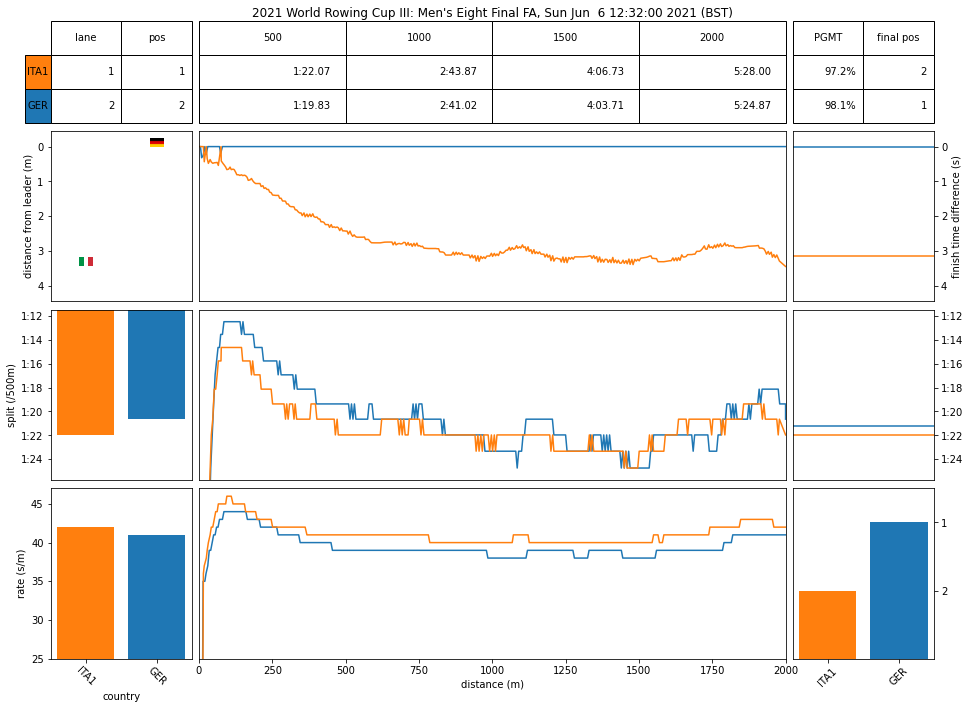

In [6]:
dash = dashboard.Dashboard.load_last_race(figsize=(14, 10))
dash.update()

INFO:world_rowing.api:loaded most recent competition: 2021 World Rowing Cup III
INFO:world_rowing.dashboard:loading Men's Quadruple Sculls Final A, starting at 2021-06-06 11:47:00+01:00
DEBUG:world_rowing.dashboard:setting finish axes labels
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): world-rowing-api.soticcloud.net:443
DEBUG:urllib3.connectionpool:https://world-rowing-api.soticcloud.net:443 "GET /stats/api/livetracker/7cf52ba0-88f5-4d3a-bcd5-b5e6ac5ce26e HTTP/1.1" 200 None
DEBUG:world_rowing.dashboard:update_stroke_rate
DEBUG:world_rowing.dashboard:update_pace
DEBUG:world_rowing.dashboard:update_behind
DEBUG:world_rowing.dashboard:update_pos
DEBUG:world_rowing.dashboard:update_intermediates
DEBUG:world_rowing.dashboard:updating prediction axes
DEBUG:world_rowing.dashboard:update_predictions
DEBUG:world_rowing.dashboard:plot_pred_finish_behind
DEBUG:world_rowing.dashboard:plot_pred_behind
DEBUG:world_rowing.dashboard:update_pred_pace
DEBUG:world_rowing.dashboard:upd

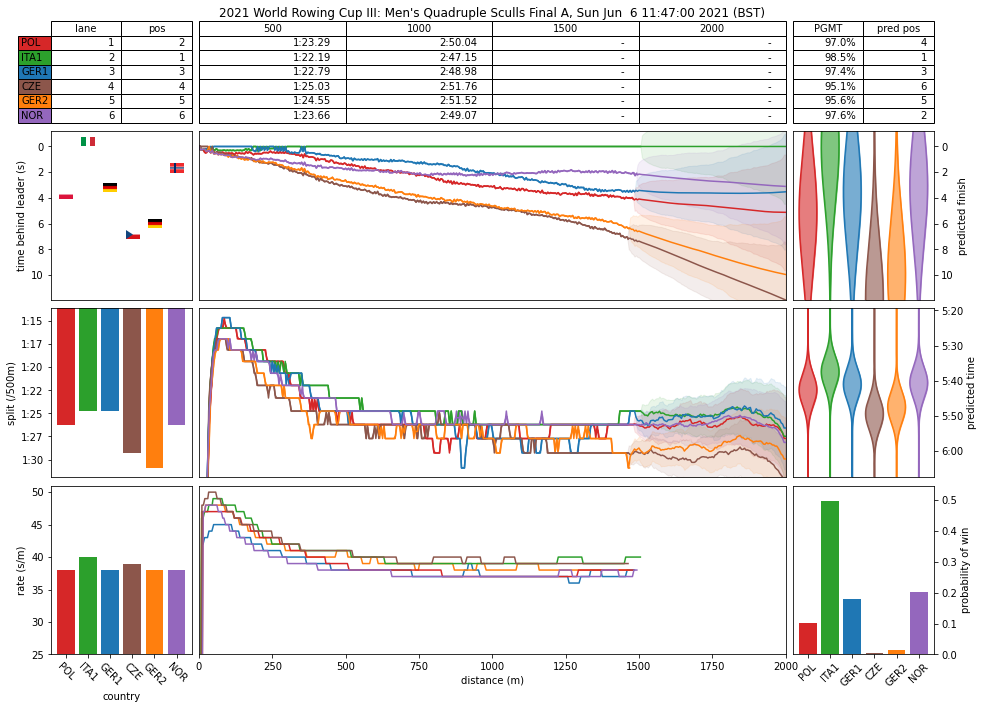

In [63]:
races = api.get_competition_races()
race = races.iloc[40]

dash = dashboard.Dashboard.from_race_id(
    race.name, figsize=(14, 10))

live_data, intermediates = dash.race_tracker.update_livedata()

dash.update(
    live_data.loc[:300],
    intermediates[[500, 1000]]
)

DEBUG:world_rowing.dashboard:update_stroke_rate
DEBUG:world_rowing.dashboard:update_pace
DEBUG:world_rowing.dashboard:update_behind
DEBUG:world_rowing.dashboard:update_pos
DEBUG:world_rowing.dashboard:update_intermediates
DEBUG:world_rowing.dashboard:updating prediction axes
DEBUG:world_rowing.dashboard:update_predictions
DEBUG:world_rowing.dashboard:update_pred_finish_behind
DEBUG:world_rowing.dashboard:update_pred_behind
DEBUG:world_rowing.dashboard:update_pred_pace
DEBUG:world_rowing.dashboard:update_finish_times
DEBUG:world_rowing.dashboard:update_win_probs
DEBUG:world_rowing.dashboard:setting prediction axes labels


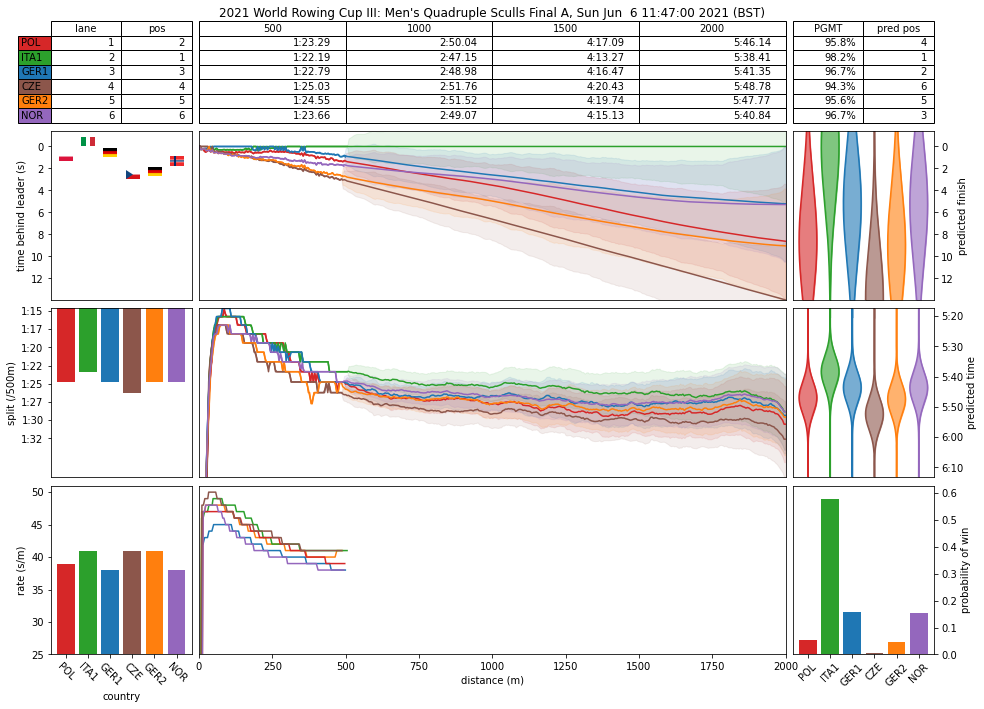

In [72]:
dash.update(
    live_data.loc[:100],
    intermediates[[500, 1000, 1500]]
)
dash.fig

In [61]:
dash.p_behind

In [40]:
intermediates[2000].sort_values()

country
ITA1    338.41
NOR     340.84
GER1    341.35
POL     346.14
GER2    347.77
CZE     348.78
Name: 2000, dtype: float64

DEBUG:world_rowing.dashboard:update_pred_behind


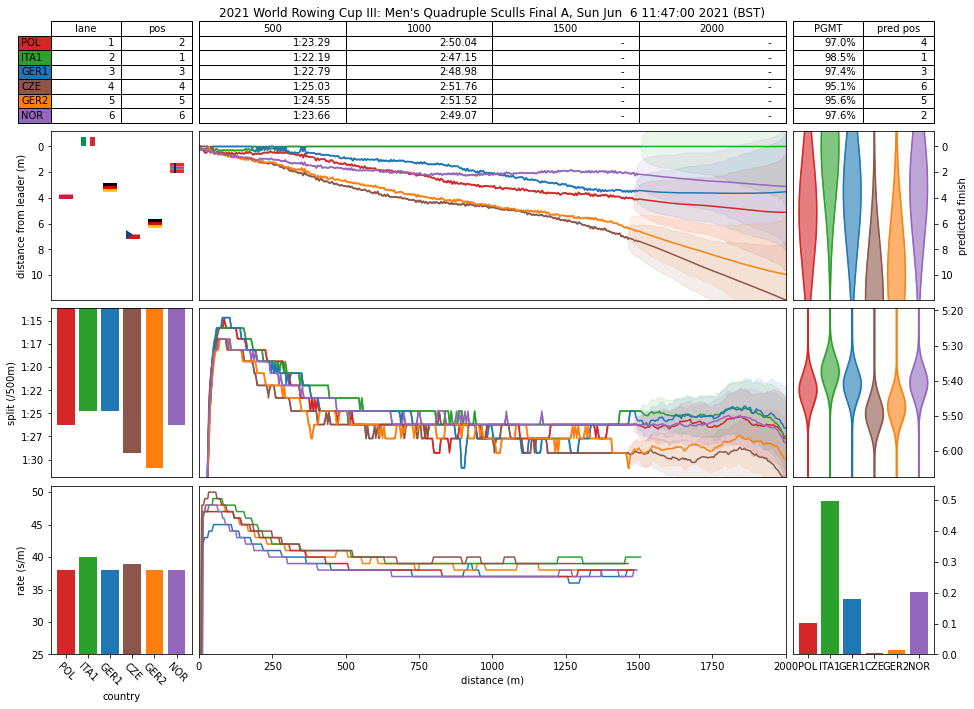

In [29]:
dash.update_pred_behind(
    pred_time, pred_time_std
)
dash.fig

In [20]:
live_data, intermediates = dash.race_tracker.update_livedata()

predictions = dash.race_tracker.predict(live_data=live_data.loc[:300])
preds_pace, preds_time, preds_dist, win_probs = predictions

DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): world-rowing-api.soticcloud.net:443
DEBUG:urllib3.connectionpool:https://world-rowing-api.soticcloud.net:443 "GET /stats/api/livetracker/7cf52ba0-88f5-4d3a-bcd5-b5e6ac5ce26e HTTP/1.1" 200 None


{'POL': <matplotlib.lines.Line2D at 0x7f15c7955f40>,
 'ITA1': <matplotlib.lines.Line2D at 0x7f15c79440a0>,
 'GER1': <matplotlib.lines.Line2D at 0x7f15c7944550>,
 'CZE': <matplotlib.lines.Line2D at 0x7f15cc166af0>,
 'GER2': <matplotlib.lines.Line2D at 0x7f15cc166490>,
 'NOR': <matplotlib.lines.Line2D at 0x7f15c7444100>}

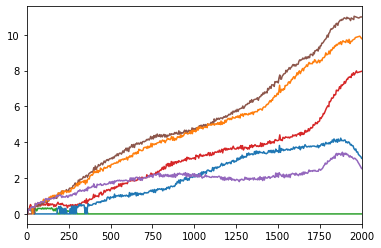

{'POL': <matplotlib.lines.Line2D at 0x7f15c7c66c70>,
 'ITA1': <matplotlib.lines.Line2D at 0x7f15c75d0bb0>,
 'GER1': <matplotlib.lines.Line2D at 0x7f15c75f9a30>,
 'CZE': <matplotlib.lines.Line2D at 0x7f15c75f9cd0>,
 'GER2': <matplotlib.lines.Line2D at 0x7f15c75fc2b0>,
 'NOR': <matplotlib.lines.Line2D at 0x7f15c75fc550>}

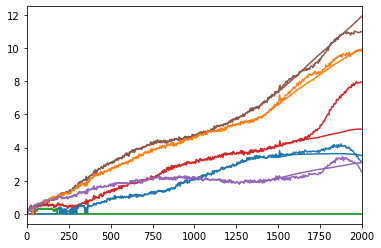

In [26]:
pred_time, pred_time_std = preds_time
pred_behind = pred_time - pred_time.min(1).values[:, None]
dash.race_tracker.plot(
    live_data.distanceTravelled,
    live_data.timeFromLeader
)
dash.race_tracker.plot(
    pred_behind
)

In [ ]:
dash.p_behind

In [ ]:
dash._init_tables()
dash.fig

In [ ]:
intermediates = dash.race_tracker.intermediate_results
intermediates[2000].argsort()

In [ ]:
dash = dashboard.Dashboard.load_last_race(figsize=(14, 10))

dash.live_notebook_dashboard()

api.show_next_races()

In [ ]:
races = api.get_competition_races()
race = races.iloc[40]

In [ ]:
dash = dashboard.Dashboard.from_race_id(race.name, figsize=(14, 10))
dash.update()

In [ ]:
dash.race_tracker.intermediate_results

In [ ]:
race_tracker = livetracker.RaceTracker(race.name)
live_data, intermediates = race_tracker.update_livedata()

In [ ]:
finish_times = intermediates[2000]

In [ ]:
pd.DataFrame([finish_times]*2, index=(0, 1))

In [ ]:
live_data.currentPosition.iloc[-1]

In [ ]:
race_tracker.plot(
    live_data.distanceTravelled, 
    time_behind,
)
plt.legend()

In [ ]:
race_tracker.intermediate_results - race_tracker.intermediate_results.min(0)

In [ ]:
leader_distance = live_data.distanceTravelled.max(1)
imax = leader_distance.searchsorted(2000)

time_behind = pd.DataFrame({
    cnt: live_data.time - np.interp(
        dist, 
        leader_distance.loc[:imax], 
        live_data.time.loc[:imax]
    )
    for cnt, dist in live_data.distanceTravelled.items()
})

In [ ]:
race_tracker.race_details

In [ ]:
race_tracker.plot(
    live_data.distanceTravelled, 
    time_behind,
)

In [ ]:
import numpy as np
np.interp?

In [ ]:
race_tracker.plot(
    live_data.distanceTravelled, 
    live_data.distanceFromLeader,
)

In [ ]:
dash.race_tracker.live_data

In [ ]:
api.get_last_race_started()

In [ ]:
comp_pgmts

In [ ]:
comp_pgmts.reset_index().groupby('BoatClass').first().sort_values('PGMT', ascending=False)

In [ ]:
comp_pgmts = api.get_competition_pgmts()
group_boat_pgmts = comp_pgmts.groupby('BoatClass')
boat_pgmts = group_boat_pgmts\
    .first()\
    .sort_values('PGMT', ascending=False)
boat_pgmts

In [ ]:
print(comp_pgmts.to_string())

In [ ]:
for i, row in comp_pgmts.iterrows():
    print(row)

In [ ]:
f, ax = plt.subplots(figsize=(12, 8))

for boat in boat_pgmts.index:
    pgmt = group_boat_pgmts.get_group(boat).PGMT.sort_values(ascending=False)
    ax.plot(pgmt.values, label=boat)
    
ax.set_xlim(0, 10)
ax.set_ylim(0.9, comp_pgmts.PGMT.max() + .01)
ax.legend();